val acc:0.08 | lr:3.088613443735492e-06, weight decay:4.720937780750535e-07
val acc:0.07 | lr:0.00010099419442438263, weight decay:7.085464991374365e-08
val acc:0.09 | lr:9.116919943939858e-06, weight decay:1.5056196853410738e-07
val acc:0.06 | lr:3.7613834974605164e-06, weight decay:7.417016707417646e-07
val acc:0.46 | lr:0.003224959608465786, weight decay:7.463808394015679e-08
val acc:0.18 | lr:5.402156450809892e-06, weight decay:6.994878967623066e-08
val acc:0.05 | lr:1.7504131915243666e-05, weight decay:3.721209255997234e-05
val acc:0.09 | lr:2.848195387701647e-05, weight decay:1.462445291298805e-08
val acc:0.16 | lr:0.0003696961814201719, weight decay:2.339026295012858e-05
val acc:0.07 | lr:0.00011544332247632994, weight decay:7.63797570753649e-05
val acc:0.45 | lr:0.003997719509152822, weight decay:4.803096594292244e-07
val acc:0.07 | lr:1.8218238623248627e-05, weight decay:2.4470262342782973e-05
val acc:0.18 | lr:6.363948888723474e-05, weight decay:2.191999198472545e-05
val acc:

Best-13(val acc:0.4) | lr:0.00145020623447378, weight decay:1.019401182961434e-08
Best-14(val acc:0.39) | lr:0.0020893157728419935, weight decay:7.306734410782803e-08
Best-15(val acc:0.39) | lr:0.001781867284977156, weight decay:4.935639351163083e-05
Best-16(val acc:0.38) | lr:0.002622307697128069, weight decay:6.616331804150324e-08
Best-17(val acc:0.38) | lr:0.0020167086006569112, weight decay:7.380889813812107e-08
Best-18(val acc:0.36) | lr:0.002481387221268272, weight decay:1.6198634125774442e-05
Best-19(val acc:0.35) | lr:0.0012645581464755184, weight decay:5.787620167197618e-05
Best-20(val acc:0.33) | lr:0.002350674629187385, weight decay:4.622546046876509e-06


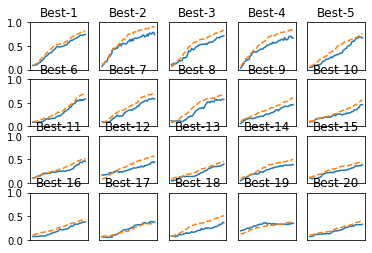

In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()
